In [3]:
import numpy as np
import pandas as pd


student=pd.read_csv("C:/Users/bhara/Desktop/project/StudentsPerformance.csv")
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
print(student.corr())
print(student.isnull().sum())
print(student.describe())

               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [5]:
col=['gender','race/ethnicity','parental level of education','lunch','test preparation course']
for item in col:
    print(item.lower(),":-")
    print(student[item].value_counts(),"\n")

gender :-
female    518
male      482
Name: gender, dtype: int64 

race/ethnicity :-
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64 

parental level of education :-
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64 

lunch :-
standard        645
free/reduced    355
Name: lunch, dtype: int64 

test preparation course :-
none         642
completed    358
Name: test preparation course, dtype: int64 



In [6]:
student["total all markes"]= pd.Series(student["math score"]+student["reading score"]+student["writing score"], index=student.index)
student.head(4)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total all markes
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148


In [7]:
student["avg score"]=np.mean(student[['math score','reading score', 'writing score']],axis=1).round(1)
student["admitted"]=np.where(student['avg score']>70,1,0)
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total all markes,avg score,admitted
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.7,1
1,female,group C,some college,standard,completed,69,90,88,247,82.3,1
2,female,group B,master's degree,standard,none,90,95,93,278,92.7,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.3,0
4,male,group C,some college,standard,none,76,78,75,229,76.3,1


In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

student["gender_code"]=le.fit_transform(student[["gender"]])
student["race/ethnicity_code"]=le.fit_transform(student[["race/ethnicity"]])
student["parental level of education_code"]=le.fit_transform(student[["parental level of education"]])
student["lunch_code"]=le.fit_transform(student[["lunch"]])
student["test preparation course_code"]=le.fit_transform(student[["test preparation course"]])
cols=['gender_code','race/ethnicity_code','parental level of education_code','lunch_code','test preparation course_code']
target=student['admitted']
student[cols].head()

C:\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,gender_code,race/ethnicity_code,parental level of education_code,lunch_code,test preparation course_code
0,0,1,1,1,1
1,0,2,4,1,0
2,0,1,3,1,1
3,1,0,0,0,1
4,1,2,4,1,1


In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()


from sklearn.svm import SVC
svc=SVC(kernel="linear", random_state=0)

from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()

x_train, x_test, y_train, y_test=train_test_split(student[cols], target, test_size=0.3, random_state=100)


# implementation for finding best accuracy

models=[LR, svc,NB]
for model in models:
    model.fit(x_train, y_train)
    y_pred=model.predict(x_test)
    print(model)
    print('confusion matrix:',"\n",confusion_matrix(y_test, y_pred))
    print('accuracy score:',accuracy_score(y_test, y_pred),"\n\n")

C:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
confusion matrix: 
 [[124  43]
 [ 56  77]]
accuracy score: 0.67 


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)
confusion matrix: 
 [[125  42]
 [ 54  79]]
accuracy score: 0.68 


GaussianNB(priors=None, var_smoothing=1e-09)
confusion matrix: 
 [[123  44]
 [ 57  76]]
accuracy score: 0.6633333333333333 




In [24]:

abc=['gender_code','race/ethnicity_code','parental level of education_code','lunch_code','test preparation course_code']
for item in abc:
    cols1=[item]
    print(item)
    target1=student['admitted']

    LR1= LogisticRegression()
    SVC1= SVC(kernel="linear", random_state=0)
    NB1= GaussianNB()

    x_train1, x_test1, y_train1, y_test1=train_test_split(student[cols1], target1, test_size=0.3, random_state=100)


# implementation for finding best accuracy

    models=[LR1, SVC1,NB1]
    for model in models:
        model.fit(x_train1, y_train1)
        y_pred1=model.predict(x_test1)
        print(model)
        print('confusion matrix:',"\n",confusion_matrix(y_test1, y_pred1))
        print('accuracy score:',accuracy_score(y_test1, y_pred1),"\n\n")
        Xnew = model.predict['1','2','4','1','1']
        print(Xnew)


gender_code
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
confusion matrix: 
 [[95 72]
 [54 79]]
accuracy score: 0.58 




C:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


TypeError: 'method' object is not subscriptable

In [12]:
import matplotlib as plt
import seaborn as sns
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
sns.barplot(x='test preparation course',y='math score',data=student)
plt.title('MATH SCORES')
plt.subplot(1, 4, 2)
sns.barplot(x='test preparation course',y='reading score',data=student)
plt.title('READING SCORES')
plt.subplot(1, 4, 3)
sns.barplot(x='test preparation course',y='writing score',data=student)
plt.title('WRITING SCORES')
plt.show()

TypeError: 'module' object is not callable

C:\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


AttributeError: module 'matplotlib' has no attribute 'title'

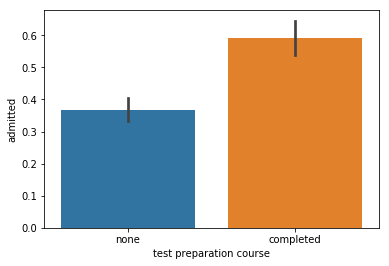

In [13]:
sns.barplot(x='test preparation course',y='admitted',data=student)
plt.title('Admitted score ')
plt.show()

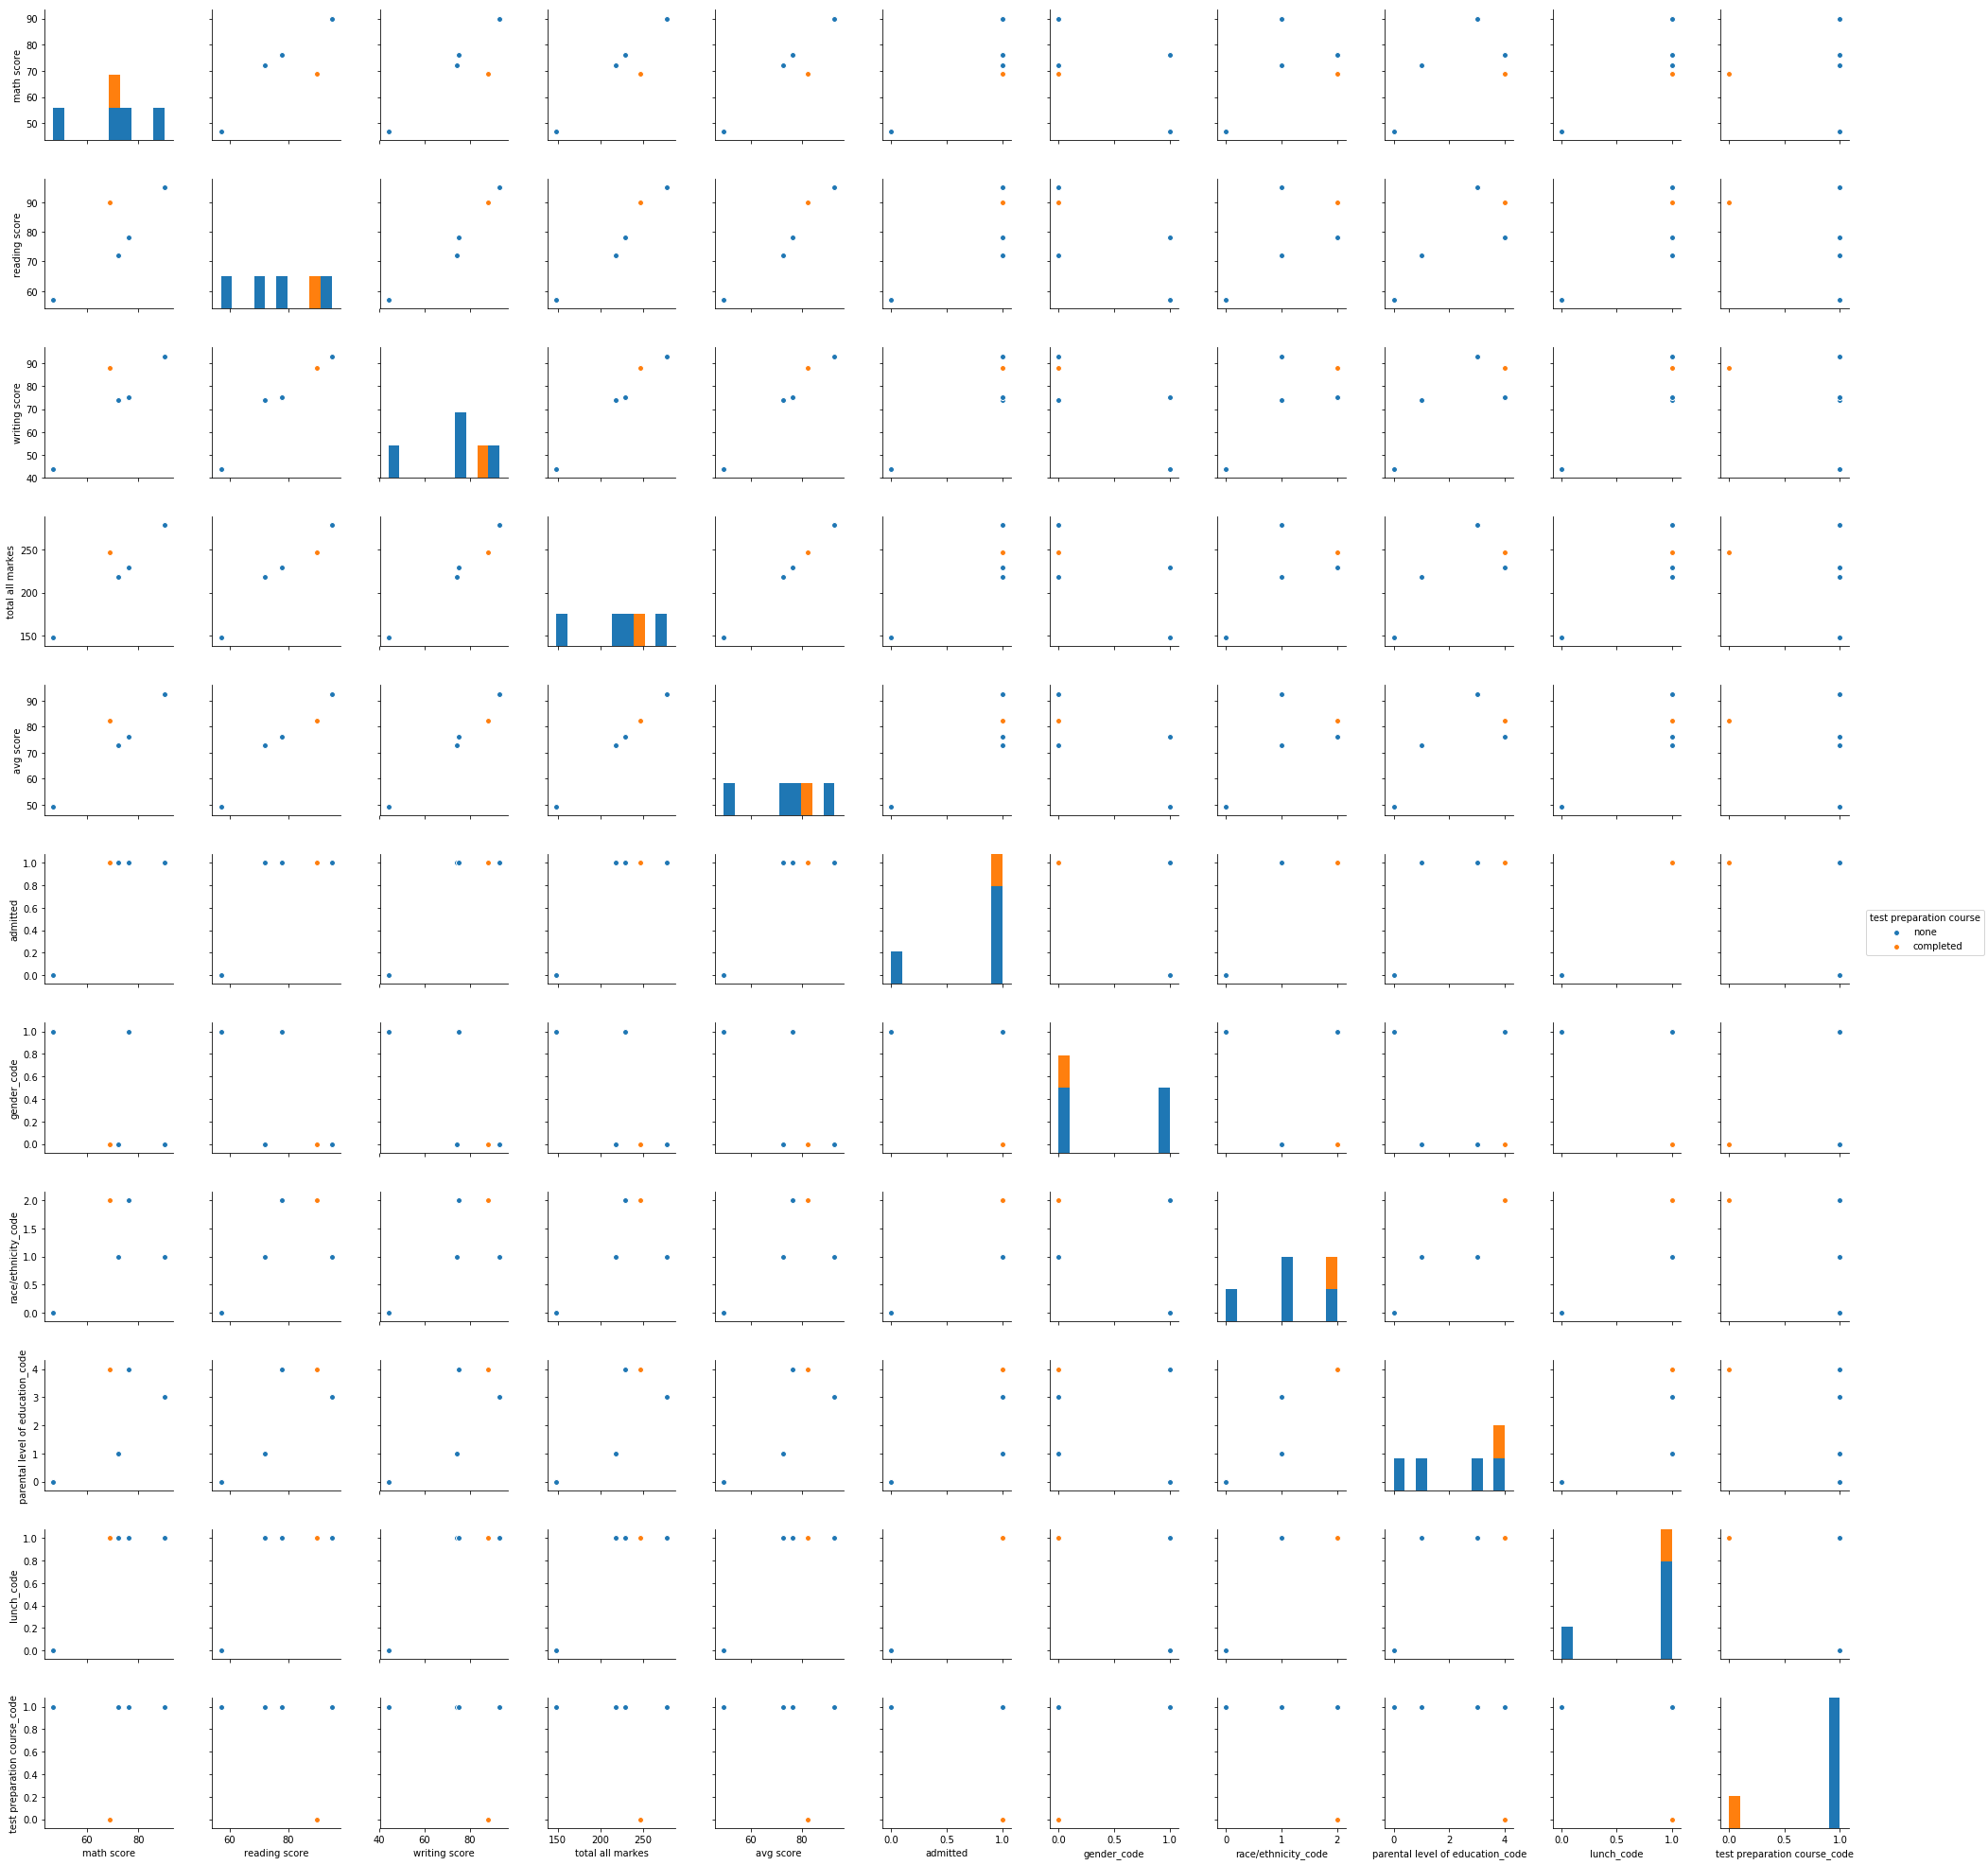

In [17]:
sns.pairplot(data=student[0:5],hue='test preparation course')


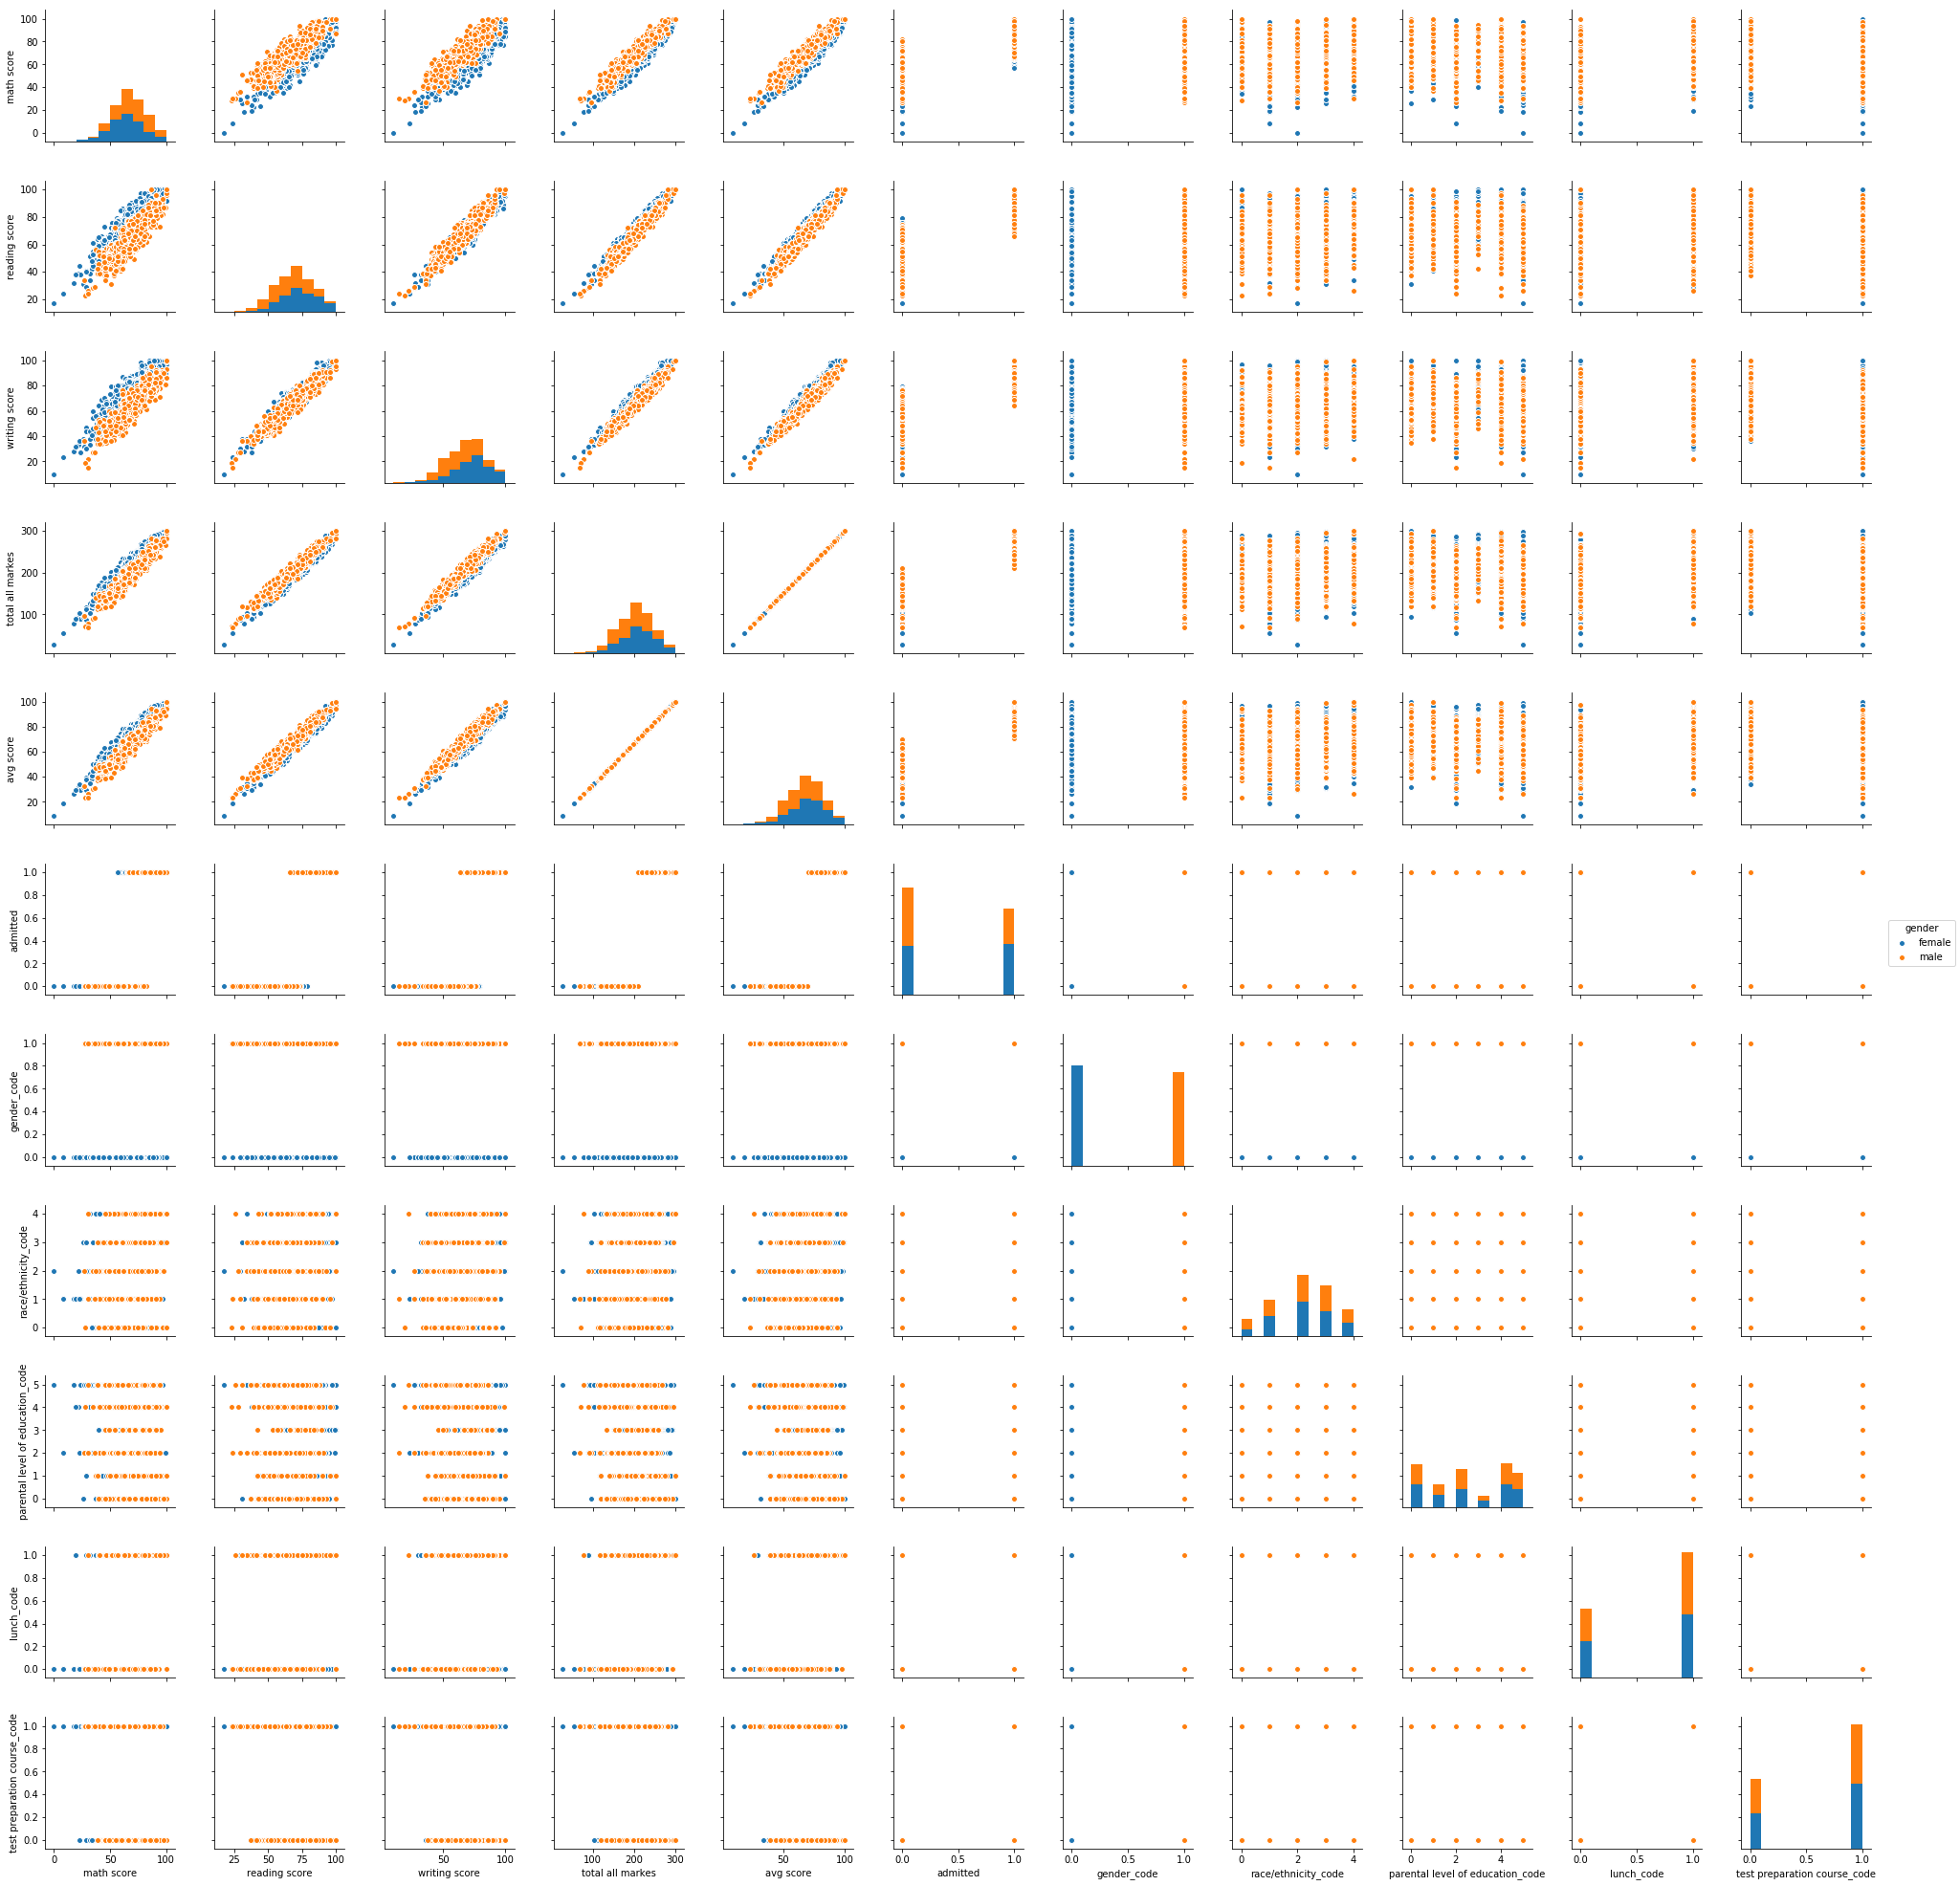

In [59]:
sns.pairplot(data=student,hue='gender')


In [1]:
Xnew = [[]]
# make a prediction
ynew = model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew, ynew))

NameError: name 'make_blobs' is not defined